In [1]:
import numpy as np
import pandas as pd
import os
import scipy.io
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# !pip install mne

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
channel_range = np.array(range(0, 18))
channel_list = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8','P7','P8','Fz','Cz','Pz']
channel_mymap = dict(zip(channel_list, channel_range))

In [5]:
# df = pd.DataFrame.from_dict(data)

In [6]:
# Import dfICAFiltered file from AttentionNewDatasetToCSV_ICA_FIltering_doneTOCSV.ipynb
df1 = pd.read_csv('/content/drive/MyDrive/CSVsb4filterADHDAndNon/dfICA_Dataset1ADHD.csv') 
df1.head()


,Unnamed: 0,A,B,C,D,E,F,G,Label
0,0,0.000021,-0.000046,0.000018,0.000025,0.000149,-0.000028,-0.000028,ADHD
1,1,-0.000009,-0.000086,0.000308,0.000030,-0.000380,-0.000483,-0.000045,ADHD
2,2,0.000108,-0.000195,0.000367,0.000077,-0.000571,-0.000431,0.000026,ADHD
3,3,0.000192,-0.000518,0.000434,0.000163,-0.000516,-0.000299,0.000106,ADHD
4,4,0.000095,-0.000843,0.000581,0.000183,-0.000386,-0.000387,0.000104,ADHD


In [7]:
df1.shape

(9912822, 9)

In [8]:
df1.drop(['A'], axis=1)  #dropped after visualisation below.

,Unnamed: 0,B,C,D,E,F,G,Label
0,0,-0.000046,0.000018,0.000025,0.000149,-0.000028,-0.000028,ADHD
1,1,-0.000086,0.000308,0.000030,-0.000380,-0.000483,-0.000045,ADHD
2,2,-0.000195,0.000367,0.000077,-0.000571,-0.000431,0.000026,ADHD
3,3,-0.000518,0.000434,0.000163,-0.000516,-0.000299,0.000106,ADHD
4,4,-0.000843,0.000581,0.000183,-0.000386,-0.000387,0.000104,ADHD
...,...,...,...,...,...,...,...,...
9912817,9912817,-0.000348,-0.000105,-0.000164,-0.000136,-0.000026,-0.000104,ADHD
9912818,9912818,-0.000324,-0.000129,-0.000177,-0.000168,-0.000065,-0.000261,ADHD
9912819,9912819,-0.000345,-0.000177,-0.000193,-0.000103,0.000058,-0.000162,ADHD
9912820,9912820,-0.000325,-0.000170,-0.000148,-0.000017,0.000143,0.000006,ADHD


In [9]:
df1.drop(['Unnamed: 0'], axis=1)


,A,B,C,D,E,F,G,Label
0,0.000021,-0.000046,0.000018,0.000025,0.000149,-0.000028,-0.000028,ADHD
1,-0.000009,-0.000086,0.000308,0.000030,-0.000380,-0.000483,-0.000045,ADHD
2,0.000108,-0.000195,0.000367,0.000077,-0.000571,-0.000431,0.000026,ADHD
3,0.000192,-0.000518,0.000434,0.000163,-0.000516,-0.000299,0.000106,ADHD
4,0.000095,-0.000843,0.000581,0.000183,-0.000386,-0.000387,0.000104,ADHD
...,...,...,...,...,...,...,...,...
9912817,-0.000394,-0.000348,-0.000105,-0.000164,-0.000136,-0.000026,-0.000104,ADHD
9912818,-0.000427,-0.000324,-0.000129,-0.000177,-0.000168,-0.000065,-0.000261,ADHD
9912819,-0.000455,-0.000345,-0.000177,-0.000193,-0.000103,0.000058,-0.000162,ADHD
9912820,-0.000320,-0.000325,-0.000170,-0.000148,-0.000017,0.000143,0.000006,ADHD


In [10]:
channel_range = np.array(range(0, 7))
channel_list = ['A','B', 'C', 'D', 'E', 'F', 'G']
channel_mymap = dict(zip(channel_list, channel_range))

In [12]:
df1.head()

,Unnamed: 0,A,B,C,D,E,F,G,Label
0,0,0.000021,-0.000046,0.000018,0.000025,0.000149,-0.000028,-0.000028,ADHD
1,1,-0.000009,-0.000086,0.000308,0.000030,-0.000380,-0.000483,-0.000045,ADHD
2,2,0.000108,-0.000195,0.000367,0.000077,-0.000571,-0.000431,0.000026,ADHD
3,3,0.000192,-0.000518,0.000434,0.000163,-0.000516,-0.000299,0.000106,ADHD
4,4,0.000095,-0.000843,0.000581,0.000183,-0.000386,-0.000387,0.000104,ADHD


In [13]:
df2 = df1.drop(['Unnamed: 0','A'], axis=1)
df2.head()

,B,C,D,E,F,G,Label
0,-0.000046,0.000018,0.000025,0.000149,-0.000028,-0.000028,ADHD
1,-0.000086,0.000308,0.000030,-0.000380,-0.000483,-0.000045,ADHD
2,-0.000195,0.000367,0.000077,-0.000571,-0.000431,0.000026,ADHD
3,-0.000518,0.000434,0.000163,-0.000516,-0.000299,0.000106,ADHD
4,-0.000843,0.000581,0.000183,-0.000386,-0.000387,0.000104,ADHD


In [54]:
df2.shape

(9912822, 7)

In [56]:
datadf2 = np.array(df2)
datadf2

array([[-4.570278560600562e-05, 1.8043650708042103e-05,
        2.5410841273014277e-05, ..., -2.808468097991868e-05,
        -2.8143195620236824e-05, 'ADHD'],
       [-8.568214994241642e-05, 0.0003081004273338,
        2.9966535767914423e-05, ..., -0.0004827634675077,
        -4.537589916100973e-05, 'ADHD'],
       [-0.000194989028617, 0.0003671622746215, 7.701935843977435e-05,
        ..., -0.0004306543715605, 2.579487943667049e-05, 'ADHD'],
       ...,
       [-0.0003446882149372, -0.0001773655469026, -0.0001927932382083,
        ..., 5.813161315464147e-05, -0.0001615843858757, 'ADHD'],
       [-0.0003249841939262, -0.0001704755942282, -0.0001481054715356,
        ..., 0.0001432756814677, 6.08886636687503e-06, 'ADHD'],
       [-4.274456802933482e-05, 7.54371820279912e-05,
        -8.130016913522356e-06, ..., -1.9164000267254384e-05,
        -4.374953980164775e-05, 'ADHD']], dtype=object)

Text(0, 0.5, 'EEG channel A')

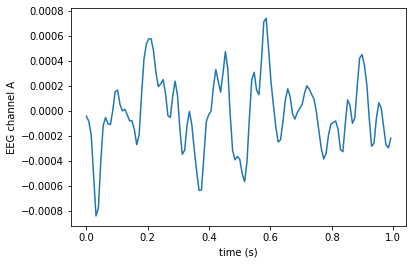

In [57]:
sf=128
i_ch = 0
time = np.arange(128) / sf
channel = datadf2[:128, channel_range[i_ch]]
plt.plot(time, channel)
plt.xlabel('time (s)')
plt.ylabel(f'EEG channel {channel_list[i_ch]}')

In [58]:
states = {
 'ADHD': datadf2[:, :],
}
states.items()

dict_items([('ADHD', array([[-4.570278560600562e-05, 1.8043650708042103e-05,
        2.5410841273014277e-05, ..., -2.808468097991868e-05,
        -2.8143195620236824e-05, 'ADHD'],
       [-8.568214994241642e-05, 0.0003081004273338,
        2.9966535767914423e-05, ..., -0.0004827634675077,
        -4.537589916100973e-05, 'ADHD'],
       [-0.000194989028617, 0.0003671622746215, 7.701935843977435e-05,
        ..., -0.0004306543715605, 2.579487943667049e-05, 'ADHD'],
       ...,
       [-0.0003446882149372, -0.0001773655469026, -0.0001927932382083,
        ..., 5.813161315464147e-05, -0.0001615843858757, 'ADHD'],
       [-0.0003249841939262, -0.0001704755942282, -0.0001481054715356,
        ..., 0.0001432756814677, 6.08886636687503e-06, 'ADHD'],
       [-4.274456802933482e-05, 7.54371820279912e-05,
        -8.130016913522356e-06, ..., -1.9164000267254384e-05,
        -4.374953980164775e-05, 'ADHD']], dtype=object))])

In [59]:
for k,v in states.items():
  print(type(v))
  print(v.shape)

<class 'numpy.ndarray'>
(9912822, 7)


In [60]:
dfStates = pd.DataFrame.from_dict(list(states))
dfStates

,0
0,ADHD


In [61]:
states.items()

dict_items([('ADHD', array([[-4.570278560600562e-05, 1.8043650708042103e-05,
        2.5410841273014277e-05, ..., -2.808468097991868e-05,
        -2.8143195620236824e-05, 'ADHD'],
       [-8.568214994241642e-05, 0.0003081004273338,
        2.9966535767914423e-05, ..., -0.0004827634675077,
        -4.537589916100973e-05, 'ADHD'],
       [-0.000194989028617, 0.0003671622746215, 7.701935843977435e-05,
        ..., -0.0004306543715605, 2.579487943667049e-05, 'ADHD'],
       ...,
       [-0.0003446882149372, -0.0001773655469026, -0.0001927932382083,
        ..., 5.813161315464147e-05, -0.0001615843858757, 'ADHD'],
       [-0.0003249841939262, -0.0001704755942282, -0.0001481054715356,
        ..., 0.0001432756814677, 6.08886636687503e-06, 'ADHD'],
       [-4.274456802933482e-05, 7.54371820279912e-05,
        -8.130016913522356e-06, ..., -1.9164000267254384e-05,
        -4.374953980164775e-05, 'ADHD']], dtype=object))])

In [62]:
bands = {'alpha': (8, 13), 'delta': (0.5, 4), 'beta': (13, 30), 'gamma': (30, np.inf)}

In [5]:
def get_powers(channel, sf=128):
    channel = channel - channel.mean()
    freq, psd = signal.periodogram(channel, fs=sf, nfft=256)

    powers = {}
    for band_name, band_limits in bands.items():
        low, high = band_limits
        powers[band_name] = psd[(freq >= low) & (freq < high)].mean().real
    return powers

In [64]:
states.items()

dict_items([('ADHD', array([[-4.570278560600562e-05, 1.8043650708042103e-05,
        2.5410841273014277e-05, ..., -2.808468097991868e-05,
        -2.8143195620236824e-05, 'ADHD'],
       [-8.568214994241642e-05, 0.0003081004273338,
        2.9966535767914423e-05, ..., -0.0004827634675077,
        -4.537589916100973e-05, 'ADHD'],
       [-0.000194989028617, 0.0003671622746215, 7.701935843977435e-05,
        ..., -0.0004306543715605, 2.579487943667049e-05, 'ADHD'],
       ...,
       [-0.0003446882149372, -0.0001773655469026, -0.0001927932382083,
        ..., 5.813161315464147e-05, -0.0001615843858757, 'ADHD'],
       [-0.0003249841939262, -0.0001704755942282, -0.0001481054715356,
        ..., 0.0001432756814677, 6.08886636687503e-06, 'ADHD'],
       [-4.274456802933482e-05, 7.54371820279912e-05,
        -8.130016913522356e-06, ..., -1.9164000267254384e-05,
        -4.374953980164775e-05, 'ADHD']], dtype=object))])

In [65]:
len(states)

1

In [66]:
subjects = list(range(0,60))

In [67]:
channel_mymap.items()

dict_items([('A', 0), ('B', 1), ('C', 2), ('D', 3), ('E', 4), ('F', 5), ('G', 6)])

In [68]:
#### subject range = 60 
# Participants were 61 children with ADHD and 60 healthy controls (boys and girls, ages 7-12). 
# 121 total children
# 61 x 1 recording each ADHD
# 60 non-adhd


In [ ]:
# df1
listOfRows = []
for subject_idx in subjects:
    #states = get_data(f"eeg_record{subject_idx}.mat")
  for ch_name, ch_idx in channel_mymap.items():
        for state, eeg in states.items():
            powers = get_powers(eeg[:, ch_idx])
            powers['state'] = state
            powers['channel'] = ch_name
            # powers['subject'] = f"subject_{subject_idx}"
            listOfRows.append(powers)

In [ ]:
listOfRows

In [ ]:
dfrowslist = pd.DataFrame.from_dict(listOfRows)

In [ ]:
len(dfrowslist)

In [ ]:
len(listOfRows )

In [ ]:
dfrowslist

In [ ]:
dfrowslist = dfrowslist.rename(columns = {'alpha':'Alpha', 'delta':'Delta', 'beta':'Beta','gamma':'Gamma','state':'Label'})

In [ ]:
dfrowslist.head()

In [ ]:
dfrowslist.drop(columns = ['channel'])

In [ ]:
dftoCSVADHD_DS_I=dfrowslist[dfrowslist["Label"] == 'ADHD'] 
dftoCSVADHD_DS_I.replace(to_replace=0,
           value=dfrowslist.mean())

In [ ]:
dftoCSVADHD_DS_I.drop(columns = ['channel']) 


In [ ]:
dftoCSVADHD_DS_I.to_csv('/content/drive/MyDrive/NewCSVs_Dataset_I_BandstoPart-III')